## Prosper Loan Data Exploration
## by Ghea Sandrine Mawen
## Preliminary Wrangling


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#uni">Univaraint Analysis</a></li>
<li><a href="#bi">bivariant Analysis</a></li>
<li><a href="#mul">Multivariate Analysis</a></li>
<li><a href="#conclude">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction
The Prosper Loan Dataset is the one used for this project. The dataset includes information on the specifics of the numerous loans made to borrowers by Prosper. The Listing Key serves as a unique identifier for each loan represented by a row in the dataset.
The dataset's rows each indicate a different characteristic of the borrower, such as employment status, credit score, etc. Other factors like Monthly Payments, On-Time Payments, Interest Rate, etc. are also stated in each row.

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# Size of graphics
plt.rcParams["axes.grid"] = False
plt.style.use('default')

In [4]:
df = pd.read_csv('prosperLoanData.csv')

In [5]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.shape

(113937, 81)

In [7]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
31102,933535823727779517D6FBB,819002,2013-06-24 01:02:31.260000000,NaN,60,Current,NaN,0.15629,0.1334,0.1234,...,-95.72,0.00,0.00,0.00,0.0,1.0,0,0,0.00,1
21327,B0583415932468103C2144D,296899,2008-03-21 17:10:05.160000000,AA,36,Completed,2011-03-27 00:00:00,0.07840,0.0750,0.0750,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.00,86
55388,7B8A34036319476812F91F6,219077,2007-10-21 14:28:53.817000000,C,36,Chargedoff,2009-09-26 00:00:00,0.25757,0.2500,0.2400,...,-61.61,0.00,2961.92,2961.92,0.0,1.0,0,0,0.00,45
5397,39693539691191366006B0D,563495,2012-02-28 11:16:32.370000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-61.04,0.00,0.00,0.00,0.0,1.0,0,0,0.00,8
30222,C4743497324193971DEED9C,479552,2010-10-13 03:15:16.467000000,NaN,36,Completed,2011-03-02 00:00:00,0.38037,0.3433,0.3333,...,-6.85,0.00,0.00,0.00,0.0,1.0,1,1,421.54,19
74091,42C33365660747290EA190E,14341,2006-05-18 15:12:28.857000000,D,36,Completed,2009-05-24 00:00:00,0.24646,0.2375,0.2100,...,-16.59,-51.57,0.00,0.00,0.0,1.0,0,0,0.00,30
29753,B90E3596678617767F349D3,1024168,2013-12-02 14:13:12.653000000,NaN,60,Current,NaN,0.24856,0.2235,0.2135,...,-16.91,0.00,0.00,0.00,0.0,1.0,0,0,0.00,1
47936,E94F3418153760284B2AF74,312549,2008-04-17 06:55:24.487000000,AA,36,Completed,2011-04-25 00:00:00,0.08871,0.0870,0.0770,...,-160.33,0.00,0.00,0.00,0.0,1.0,0,0,0.00,200
92070,E21B3585831728163B2E635,863981,2013-08-07 20:53:47.983000000,NaN,36,Current,NaN,0.27285,0.2346,0.2246,...,-19.17,0.00,0.00,0.00,0.0,1.0,0,0,0.00,45
44471,17AC3575885511416B1A5A3,742592,2013-04-03 14:57:21.370000000,NaN,36,Completed,2013-10-08 00:00:00,0.15324,0.1249,0.1149,...,-27.74,0.00,0.00,0.00,0.0,1.0,0,0,0.00,75


In [9]:
#Checking to see if there are duplicates
df.duplicated().sum()

0

In [10]:
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

<a id='wrangling'></a>
### Data Accessing and Cleaning

In [12]:
df['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [13]:
#the ListingCategory is stored as an interger. we need fixed this
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory (numeric)'].map(list_dict)
df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [14]:
df['ListingCategory'].unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

### I also notice the minimum value for the borrower rate is 0, as a borrower i will like to know if this is an outlier or its possible to borrow and pay no interest rate.

In [15]:
df.query('BorrowerRate == 0')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory
29859,75DB3366773363492DDD729,34125,2006-08-25 11:10:06.193000000,AA,36,Completed,2006-10-17 00:00:00,0.01650,0.0,-0.005,...,0.00,0.00,0.00,0.00,1.0,0,0,0.0,13,Not Available
46874,3F5C3389508503122919326,143562,2007-05-28 06:40:54.803000000,HR,36,Defaulted,2010-10-05 00:00:00,0.01315,0.0,-0.010,...,-24.24,82.62,-15.36,5.28,1.0,0,0,0.0,1,Not Available
65259,BB4E34191946516388AD563,310792,2008-04-15 05:35:10.670000000,HR,36,Completed,2011-04-18 00:00:00,0.01987,0.0,-0.010,...,0.00,0.00,0.00,0.00,1.0,0,1,1000.0,1,Business
76858,7ADE3385294777364BFEDD6,115163,2007-03-24 10:03:30.717000000,C,36,Completed,2010-03-27 00:00:00,0.00653,0.0,-0.010,...,0.00,0.00,0.00,0.00,1.0,0,1,50.0,2,Not Available
78401,D51133706364386842C7D6B,49783,2006-10-18 06:15:54.327000000,D,36,Completed,2009-10-23 00:00:00,0.00653,0.0,-0.005,...,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1,Not Available
78920,CBC03418552010666B09260,319969,2008-04-28 11:48:10.400000000,C,36,Completed,2009-09-15 00:00:00,0.01987,0.0,-0.010,...,-354.16,0.00,0.00,0.00,1.0,0,1,6800.0,2,Debt Consolidation
90051,88D333775844604529658CA,77055,2006-12-21 15:20:20.630000000,HR,36,Completed,2007-07-24 00:00:00,0.01650,0.0,-0.005,...,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1,Not Available
112717,C52F3426964405073574757,369381,2008-07-17 22:44:53,A,36,Completed,2010-10-13 00:00:00,0.01315,0.0,-0.010,...,0.00,0.00,0.00,0.00,1.0,0,1,3000.0,1,Other


#### Takeaway: we can see there are over 8 people who don't pay any interest rate, but at the same time we can also that the lenderyeilds is negative all through but yet we see that some of this loan have like 13 investors. i doubt if this is error resulting from the entering of the data since we have different categories like different states, occupation. So as a borrower i explore further to understand this.

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The data is divided into 2 parts:

### What is/are the main feature(s) of interest in your dataset?


>As a potential borrower, I was very curious to learn about:

1. what affects the interest rates of loans

2. How the prosper score acts as a determinant to the loan amount and interest rate 

3. What size loans do customers on Prosper often take out? Who takes on large loans? Who recieves small loans?

4. Exist any variances in loans based on various employment status/income ranges levels?

5. Which listing category receives the most loans, and for what reasons?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
2. ListingCategory: 	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
3. Occupation:	The Occupation selected by the Borrower at the time they created the listing.
4. CurrentCreditLines:	Number of current credit lines at the time the credit profile was pulled.
5. EmploymentStatus:	The employment status of the borrower at the time they posted the listing.
6. EmploymentStatusDuration:	The length in months of the employment status at the time the listing was created.
7. IncomeRange: The income range of the borrower at the time the listing was created.


<a id='uni'></a>
## Univariate Exploration




### 1. lets explore BorrowerAPR to see the distribution of total Annual Borrowers Percentage Rate (APR) spend for a loan

In [57]:
#Function is used to plot our pie chart everytime. 
def plothist(values ):
    sb.distplot(values, kde=False)
    plt.show;

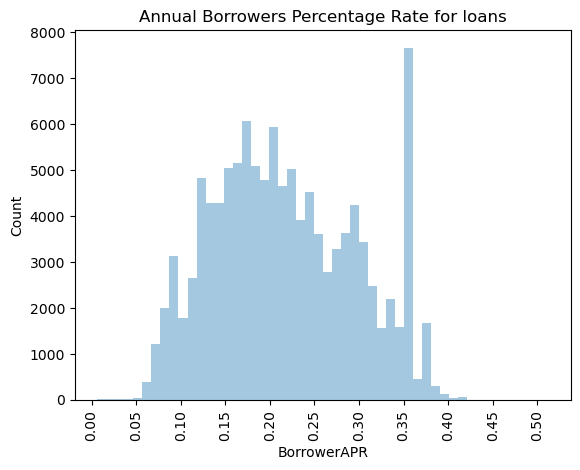

In [58]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
values1 = df['BorrowerAPR']
title = plt.title('Annual Borrowers Percentage Rate for loans');
xlabel = plt.xlabel('BorrowerAPR');
ylabel = plt.ylabel('Count');
plt.ylabel('Count');
plt.xticks(np.arange(0, df['BorrowerAPR'].max()+0.05, 0.05));
plt.xticks(rotation=90);
plothist(values1)

#### Takeaway: We can see that the interest rate is normally distributed and slightly skew to the right and has a high value at o.32.

### 2. What are the most popular Occupation, from this we get to explore further if someone occupation affects the amount of money they get.



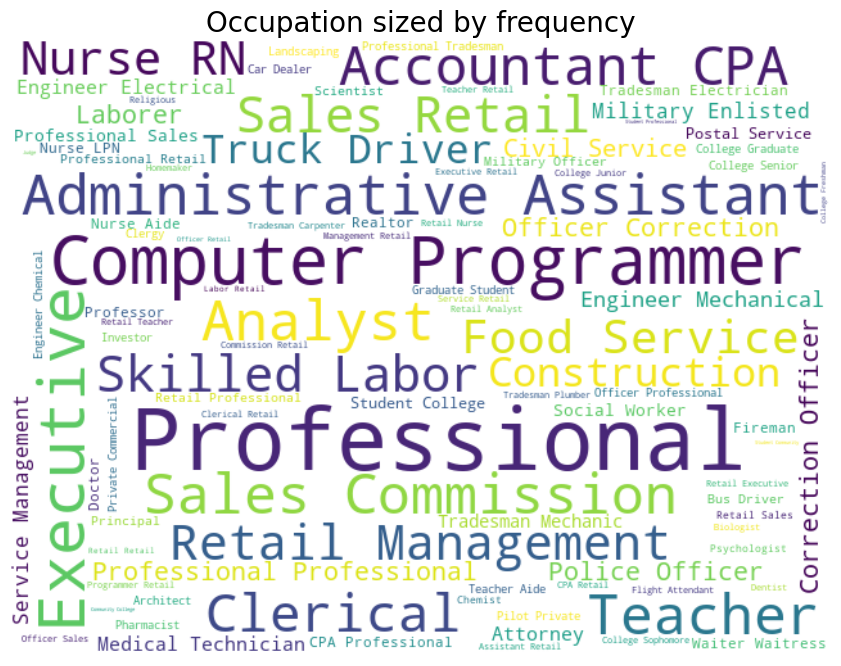

In [17]:
 # What are the most popular Occupation
# using a Wordcloud 
content = df.loc[:, 'Occupation'].str.cat(others=None, sep=' ')


# Instantiate word cloud object
wc = WordCloud(background_color='white', max_words=200,stopwords=STOPWORDS,
              width=640, height=480,contour_width=.01, 
                      contour_color='green')
# Generate word cloud
wc.generate(content)
# Show word cloud
plt.figure(figsize = [12, 8])
plt.imshow(wc, interpolation='bilinear')
plt.title('Occupation sized by frequency', fontsize=20)
plt.axis('off');

### 3. which states take loans the most

In [18]:
# which states take loans the most
state_count = df.BorrowerState.value_counts()
state_count[0:10]
order = state_count.index

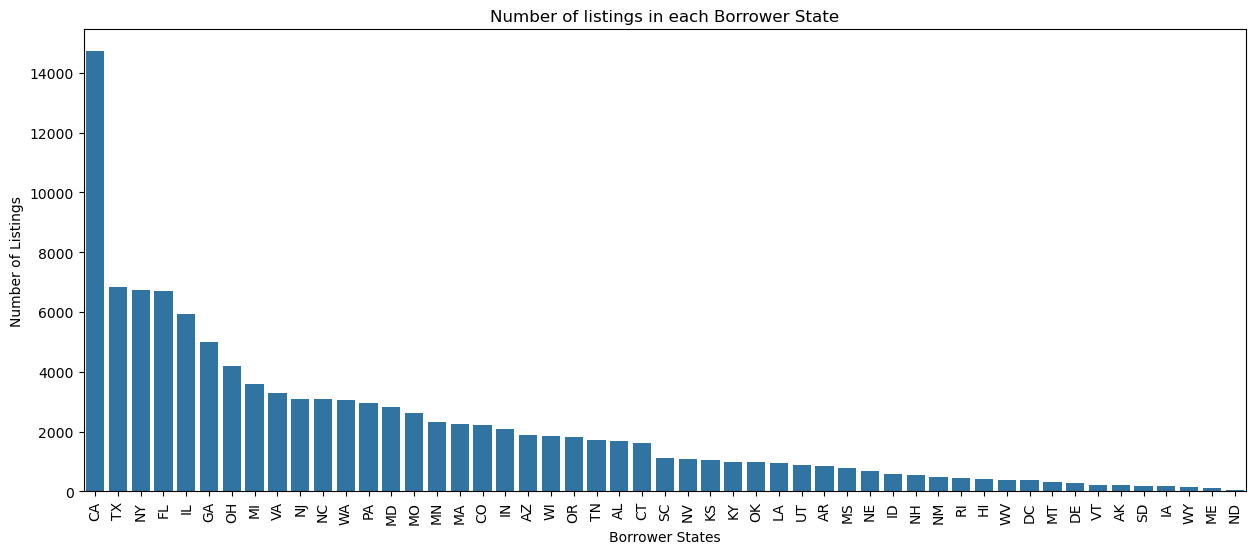

In [19]:
base_color = sb.color_palette()[0]

plt.figure(figsize=(15, 6))
sb.countplot(data=df, x='BorrowerState', color=base_color, order= order);
plt.title('Number of listings in each Borrower State');
plt.xlabel('Borrower States');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);

#### Takeaway: The state of California, is the state with the most number of borrowers, and California, Texas and New York are the top 3 states with the most number of borrowers. 
#### The state of North Dakota is the state with the least number of borrowers, and Wyoming, Maine and North Dakota are the 3 states with the least number of borrowers.

### Lets look at the distribution of interest rate.

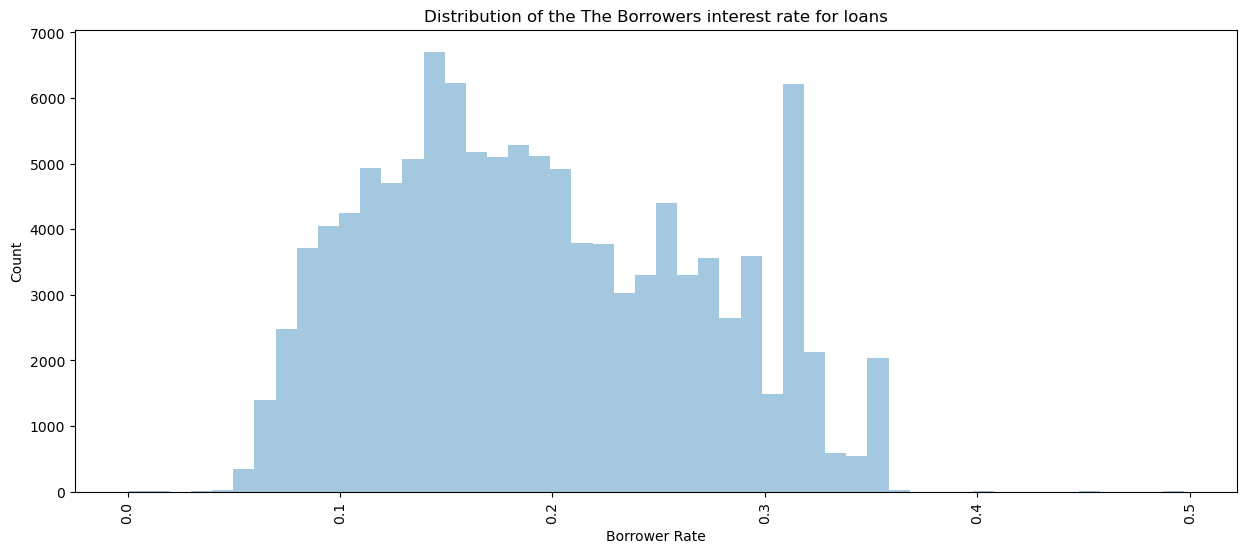

In [59]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
plt.figure(figsize=(15, 6))
value2 = df['BorrowerRate']
# Call the histogram function
plothist(value2)
plt.title('Distribution of the The Borrowers interest rate for loans');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');
plt.xticks(rotation=90);

### Lets look at the different Income ranges to see the income ranges of most borrowers.

In [22]:
income_range = df.IncomeRange.value_counts()
order = income_range.index

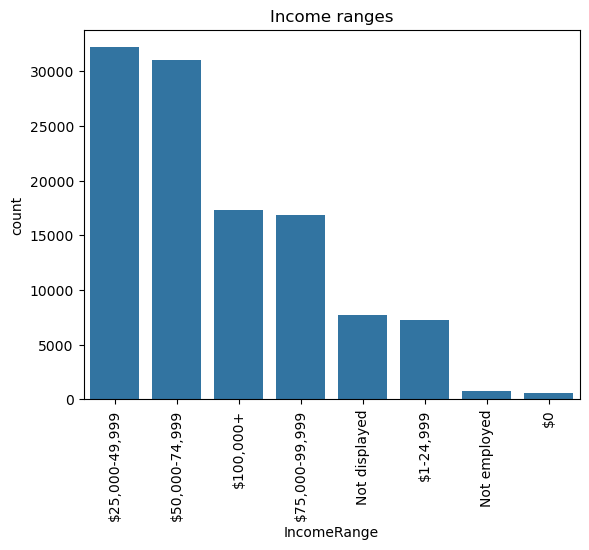

In [35]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='IncomeRange', color=base_color, order = order);
plt.title("Income ranges")
plt.xticks(rotation = 90);


### How many of the borrowers own a home ?

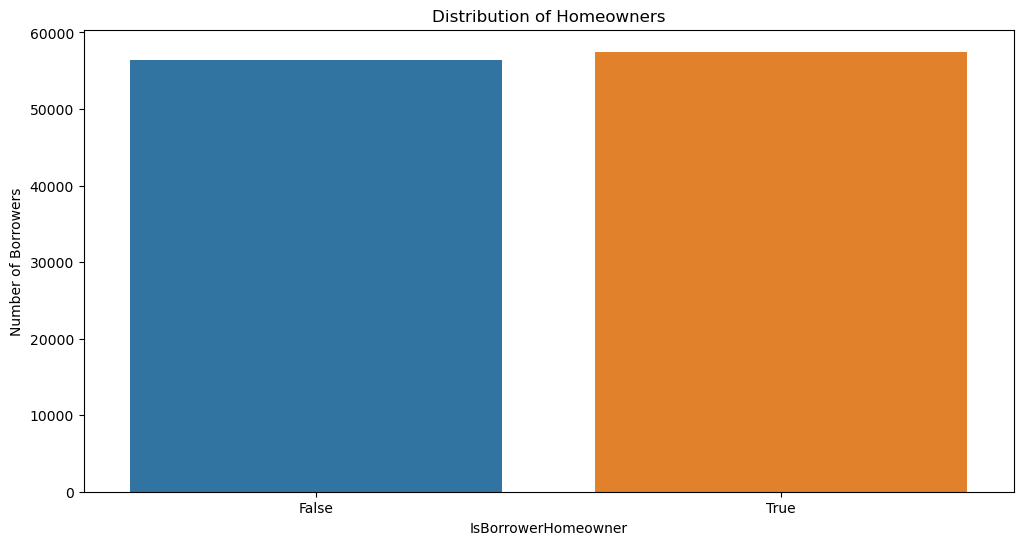

In [24]:
fig = plt.figure(figsize=(12,6))
sb.countplot(x='IsBorrowerHomeowner', data=df)
plt.title('Distribution of Homeowners')
plt.ylabel('Number of Borrowers')
plt.show()

#### Lets Look at the reasons why people take loans


In [25]:
df.ListingCategory.value_counts().index

Index(['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement',
       'Business', 'Auto', 'Personal Loan', 'Household Expenses',
       'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans',
       'Vacation', 'Student Use', 'Motorcycle', 'Engagement Ring',
       'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV'],
      dtype='object')

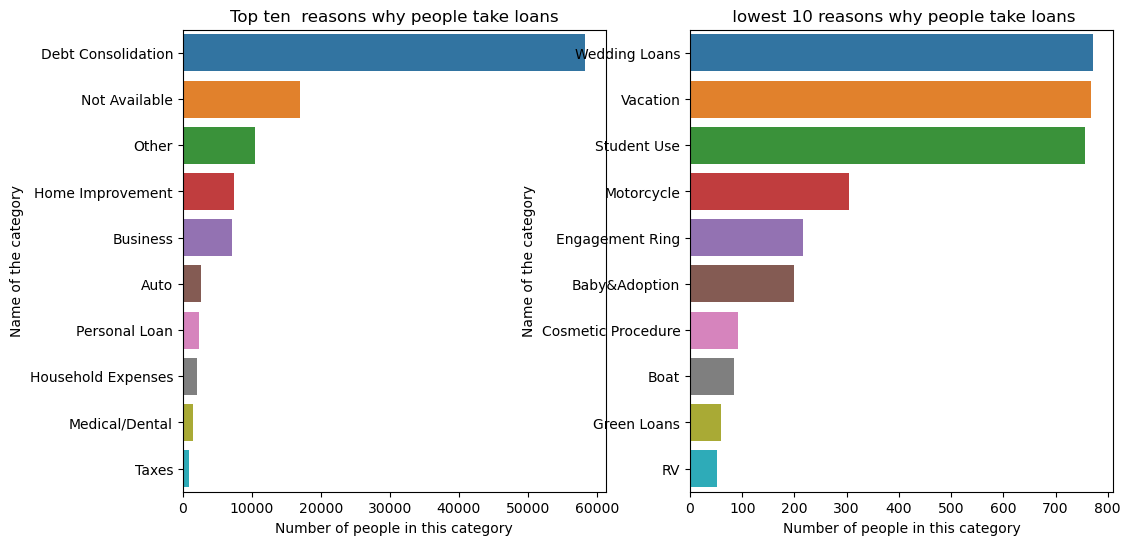

In [26]:

#Plot ordinal variable distribution 'ListingCategory'
#Plot the top ten categories
top_categories_list = df['ListingCategory'].value_counts()[:10].index.tolist()
top_categories_count = df['ListingCategory'].value_counts()[:10].values.tolist()

#Plotting the lowest 10 categories
least_categories_list = df['ListingCategory'].value_counts()[-10:].index.tolist()
least_categories_count = df['ListingCategory'].value_counts()[-10:].values.tolist()

f,(ax1,ax2) = plt.subplots(ncols=2, sharey=False, sharex=False,
                          figsize=(12,6))

sb.barplot(x=top_categories_count, y=top_categories_list, ax=ax1)
ax1.set_title('Top ten  reasons why people take loans')
ax1.set_xlabel('Number of people in this category')
ax1.set_ylabel('Name of the category')

sb.barplot(x=least_categories_count, y=least_categories_list, ax=ax2)
ax2.set_title(' lowest 10 reasons why people take loans')
ax2.set_xlabel('Number of people in this category')
ax2.set_ylabel('Name of the category')
plt.show()
# color = sb.color_palette()[1]
# sb.countplot(data=df, x='ListingCategory', color=base_color);
# plt.xlabel('different reasons why people borrow money');
# locs, labels = plt.xticks()
# cat_counts = df['ListingCategory'].value_counts()

# for loc, label in zip(locs, labels):
#     count = cat_counts[float(label.get_text())]
#     pct_string = '{}'.format(count)
#     plt.text(loc, count, pct_string, ha = 'center', color = 'black')
    
    

#### lets explore this interesting feature prosper score, we will see the highest prosper score with highest amount of loans

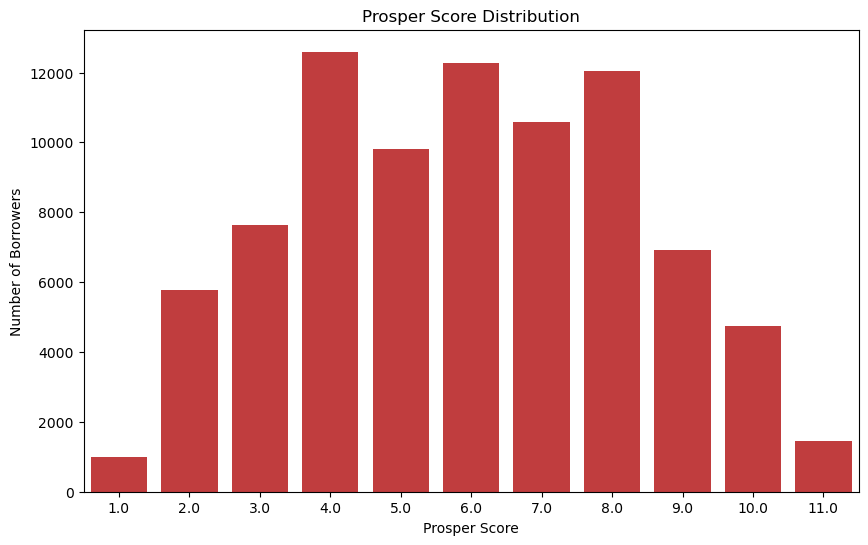

In [27]:
fig = plt.figure(figsize=(10,6))
color = sb.color_palette()[3]
sb.countplot(x='ProsperScore', data=df, color = color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score')
plt.ylabel('Number of Borrowers')
plt.show()

### Debt to Income Ratio


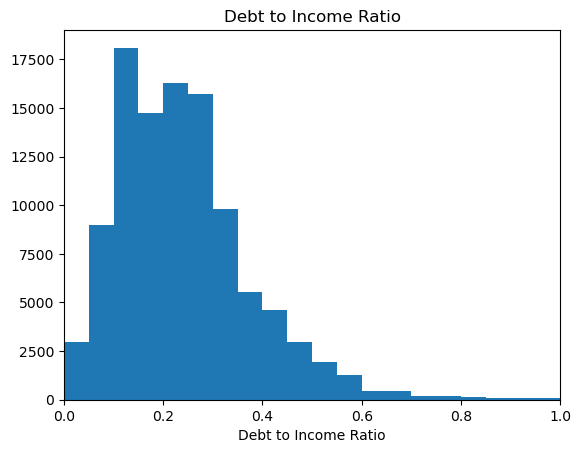

In [36]:
# Plot DebtToIncomeRatio
bin_size = 0.05
bins = np.arange(0, df['DebtToIncomeRatio'].max()+bin_size, bin_size)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.title("Debt to Income Ratio")
plt.xlim(0,1);

I wont be exploring further since i dont know the scale the used. we can there are over 799 rows.

### Prosper credit rating

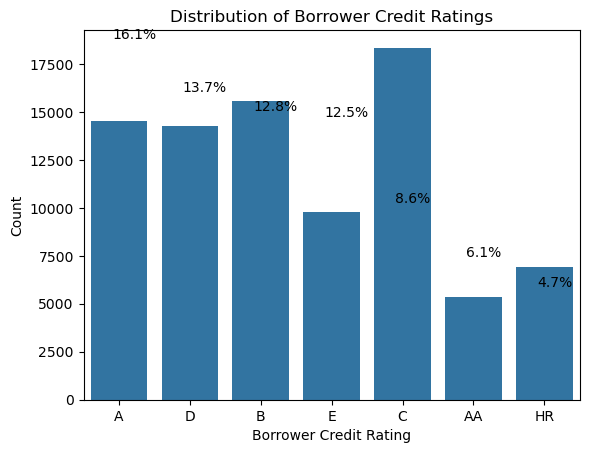

In [32]:
#Plot ordinal variable distribution 'ProsperRating'
n_loans=df['LoanStatus'].value_counts().sum()
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = color)
plt.xlabel('Borrower Credit Rating')
plt.ylabel('Count')
plt.title('Distribution of Borrower Credit Ratings');
rating_counts = df['ProsperRating (Alpha)'].value_counts()
for i in range(rating_counts.shape[0]):
    count = rating_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    plt.text(i-0.1,count+700, pct_string, va = 'center');
plt.show()

Take away:We can notice that the highest frequency from a C Prosper Rating (making up for 21.6% of the total number of loans) and the lowest frequency from the AA Prosper Rating loans(6.3%).

#### lets look at the EmploymentStatus of borrowers.

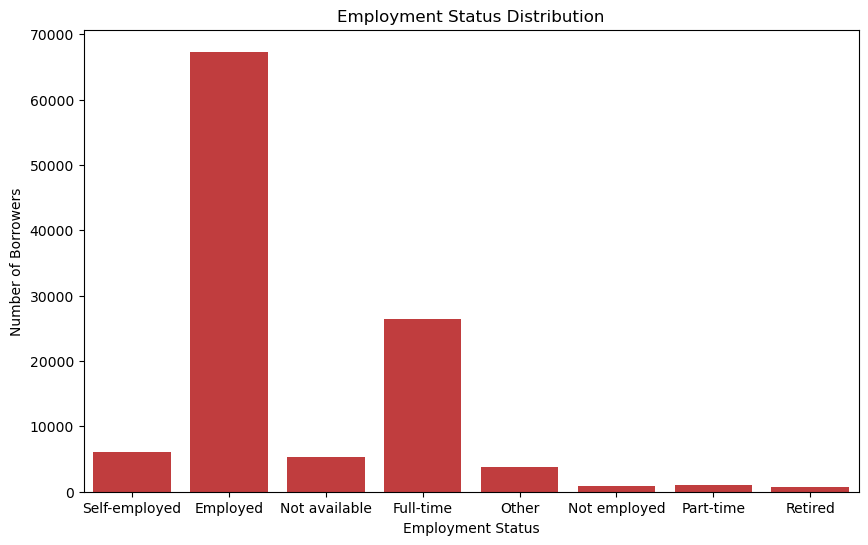

In [34]:
fig = plt.figure(figsize=(10,6))
color = sb.color_palette()[3]
sb.countplot(x='EmploymentStatus', data=df, color = color)
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Number of Borrowers')
plt.show()

Takeaway: most people that take/get loans are employed, followed by full time employers amd self employed people.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>1. There are some people with 0 income levels and i am interested to learn how the properscore is collected for this people, we will explore this latter when we get to bivariant.
2.I also notice the minimum value for the borrower rate is 0, as a borrower i will like to know if this is an outlier or its possible to borrow and pay no interest rate.
3.Suprisingly, Borrowers who are Retired, have also have a similar range of Prosper Scores to Borrowers who are employed Part-Time.
 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. The ListingCategory is stored as an interger. we needed to fixed this, which i did.

<a id='bi'></a>
## Bivariate Exploration



#### Does Higher Income Lead to Higher Prosper Scores ?

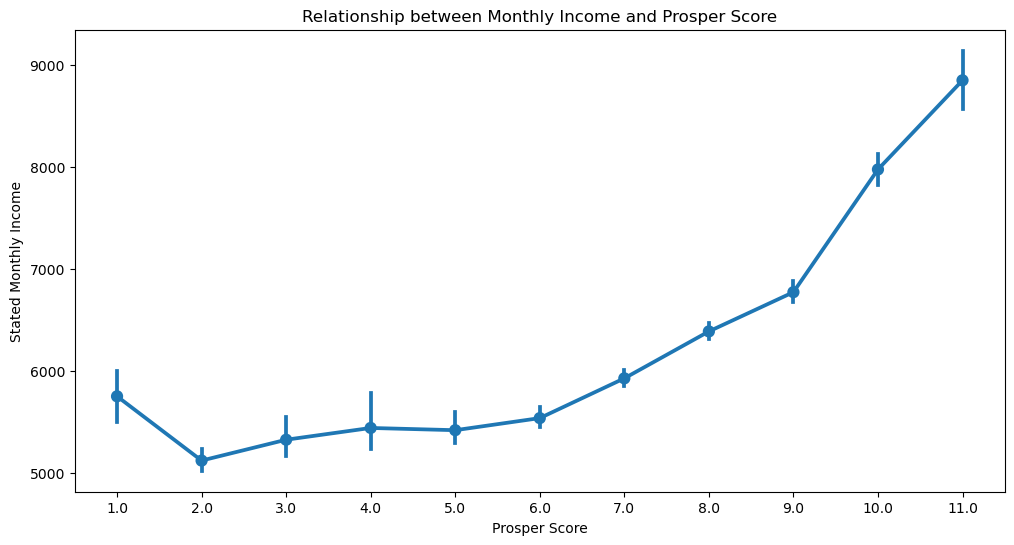

In [37]:

fig = plt.figure(figsize=(12,6))
sb.pointplot(y='StatedMonthlyIncome', x='ProsperScore', data=df)
plt.title('Relationship between Monthly Income and Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Stated Monthly Income')
plt.show()

It can be observed that there is Strong Positive Correlation between Monthly Income and Prosper Score. Higher the Monthly Income, Higher the Prosper Score.

#### Relationship between home ownership lead to Higher Prosper Score ?

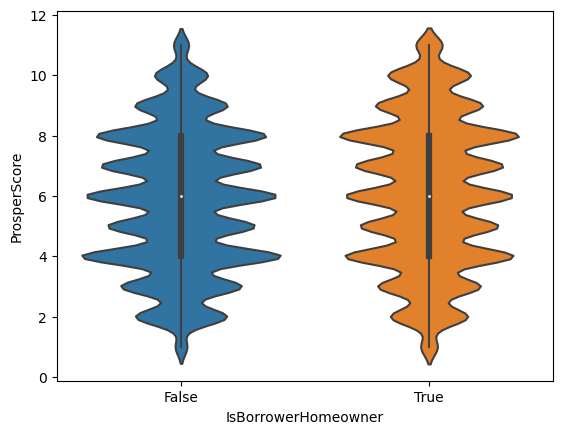

In [38]:
sb.violinplot(data=df, y='ProsperScore', x='IsBorrowerHomeowner');

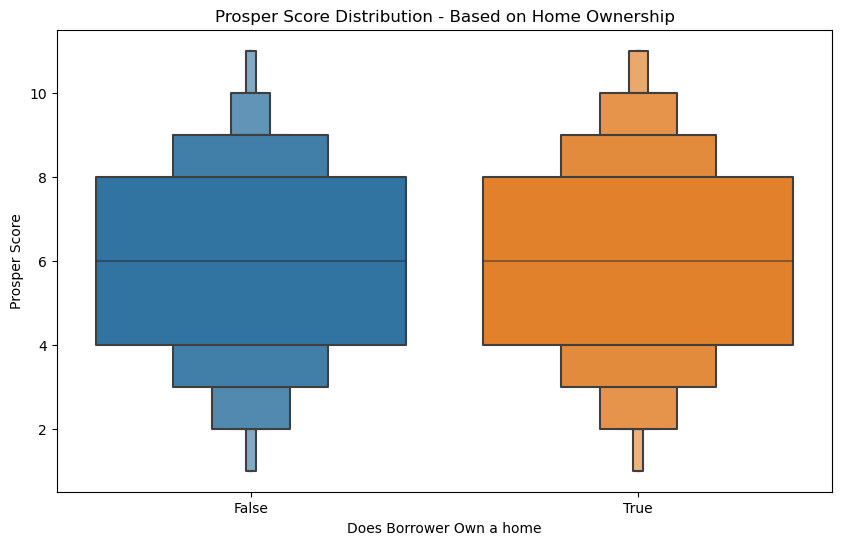

In [39]:

fig = plt.figure(figsize=(10,6))
sb.boxenplot(y='ProsperScore', x='IsBorrowerHomeowner', data=df)
plt.title('Prosper Score Distribution - Based on Home Ownership')
plt.xlabel('Does Borrower Own a home')
plt.ylabel('Prosper Score')
plt.show()

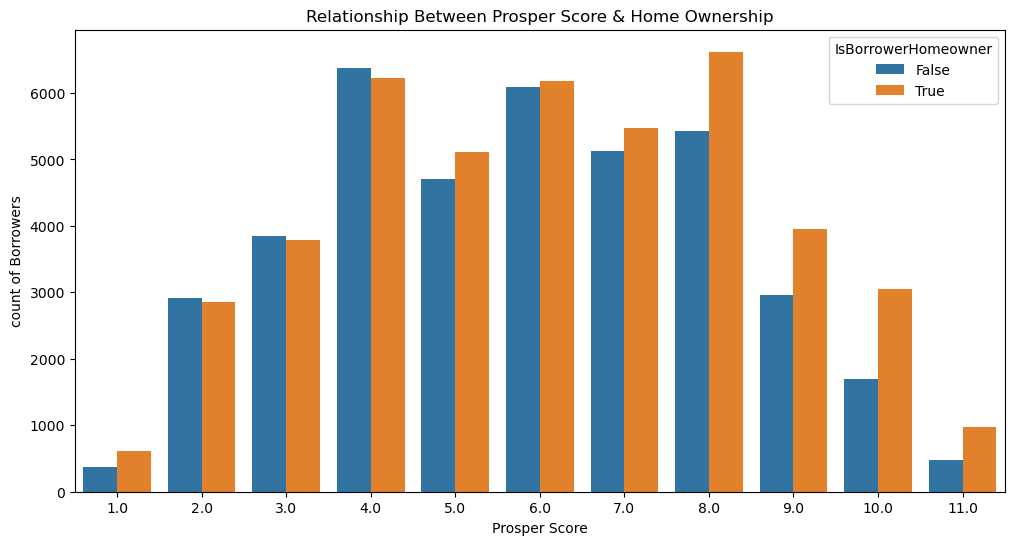

In [40]:
fig = plt.figure(figsize=(12,6))
sb.countplot(hue='IsBorrowerHomeowner', x='ProsperScore', data=df)
plt.title('Relationship Between Prosper Score & Home Ownership')
plt.ylabel('count of Borrowers')
plt.xlabel('Prosper Score')
plt.show()

We can see that the prosper score of people with house is higher we can see that as we move towards having high prosper scores those with houses turn to dominate. 

### How does Borrower's Employment affect the Loan Interest Rate ?


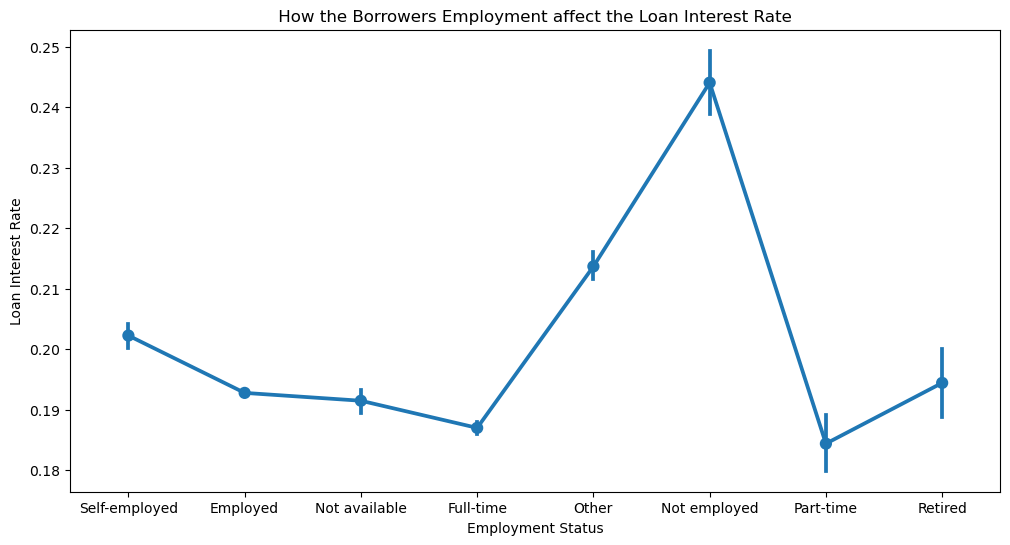

In [41]:

fig = plt.figure(figsize=(12,6))
sb.pointplot(y='BorrowerRate', x='EmploymentStatus', data=df)
plt.title(' How the Borrowers Employment affect the Loan Interest Rate ')
plt.xlabel('Employment Status')
plt.ylabel('Loan Interest Rate')
plt.show()


People who are unemployed  pay more interests. But we also see a decreasing effect from self_employed to full_time meaning the pay interest rate decreases in that order also.

#### how does borrower APR relates to loan original amount

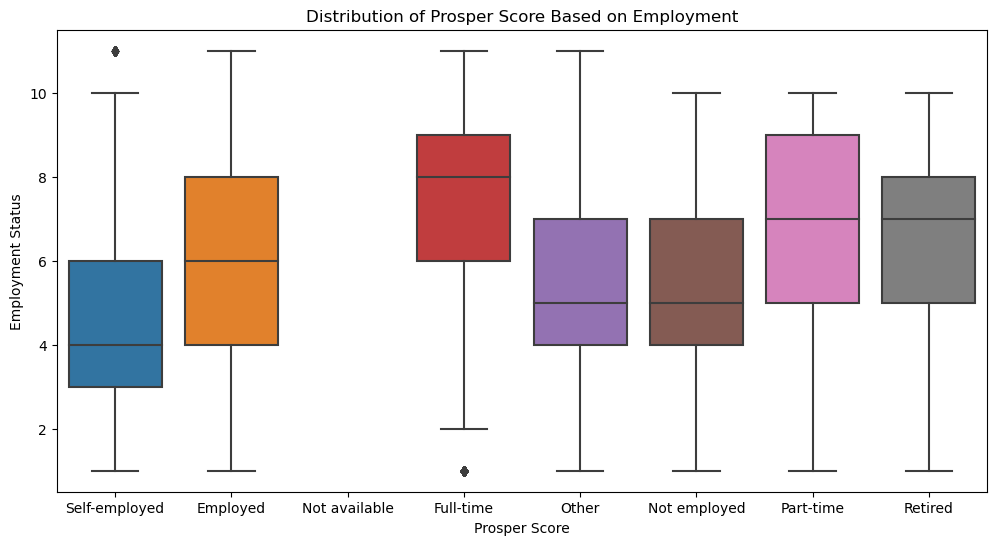

In [46]:
fig = plt.figure(figsize=(12,6))
sb.boxplot(y='ProsperScore', x='EmploymentStatus', data=df)
plt.title('Distribution of Prosper Score Based on Employment')
plt.ylabel('Employment Status')
plt.xlabel('Prosper Score')
plt.show()

#### how does borrower APR relates to loan original amount

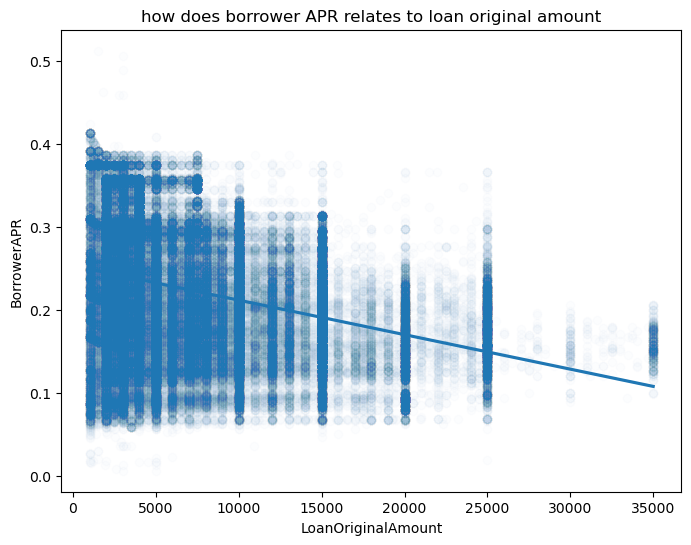

In [42]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01})
plt.title('how does borrower APR relates to loan original amount')
plt.ylabel('BorrowerAPR')
plt.xlabel('LoanOriginalAmount');

#### Does the Interest Rate depend on Borrower's Prosper Score ?

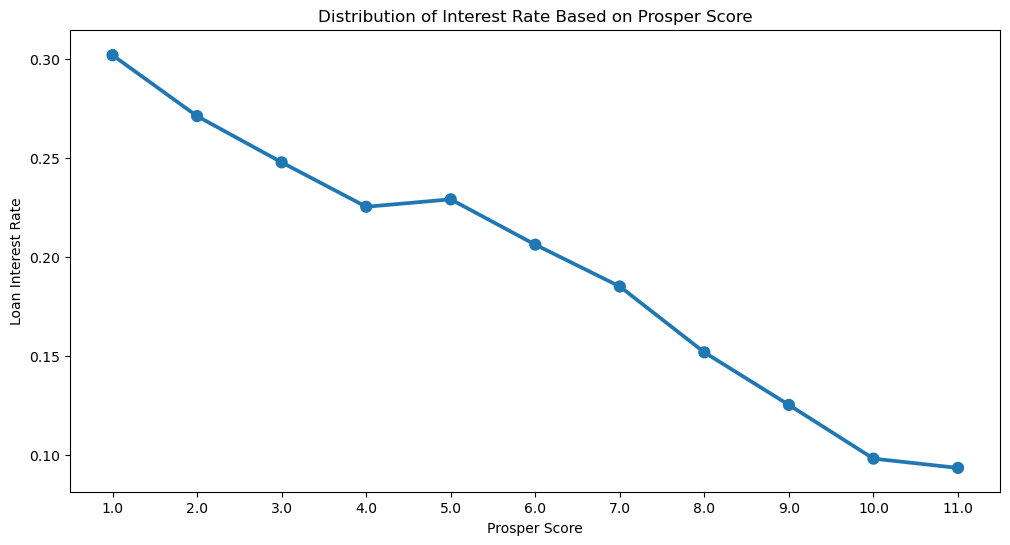

In [63]:

fig = plt.figure(figsize=(12,6))
sb.pointplot(y='BorrowerRate', x='ProsperScore', data=df)
plt.title('Distribution of Interest Rate Based on Prosper Score')
plt.ylabel('Loan Interest Rate')
plt.xlabel('Prosper Score')
plt.show()


A High negative Correlation can be observed between the Interest Rate and Borrower's Prosper Score. Relationship: Higher prosper score  -> Lower Interest Rate and vice-versa.

### We also noticed that that there were people who had 0 interest rate and also people who didn't have any imcome are this people te same?

In [47]:
df1 = df.query('BorrowerRate == 0')

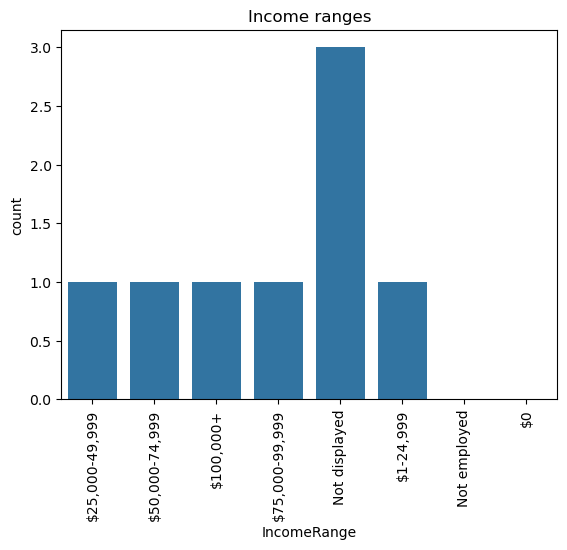

In [49]:
base_color = sb.color_palette()[0]
sb.countplot(data=df1, x='IncomeRange', color=base_color, order = order);
plt.title("Income ranges")
plt.xticks(rotation = 90);


This shows people paying with no interest rate all earn salaries, i am then curious who are those people paying no interest on their loans. Further analysis can be done on this variables but i might want to conclude that this 0 interest rate was as a result of data entry errors.

#### Does longer Duration of Loans indicate Higher Loan Amounts ?

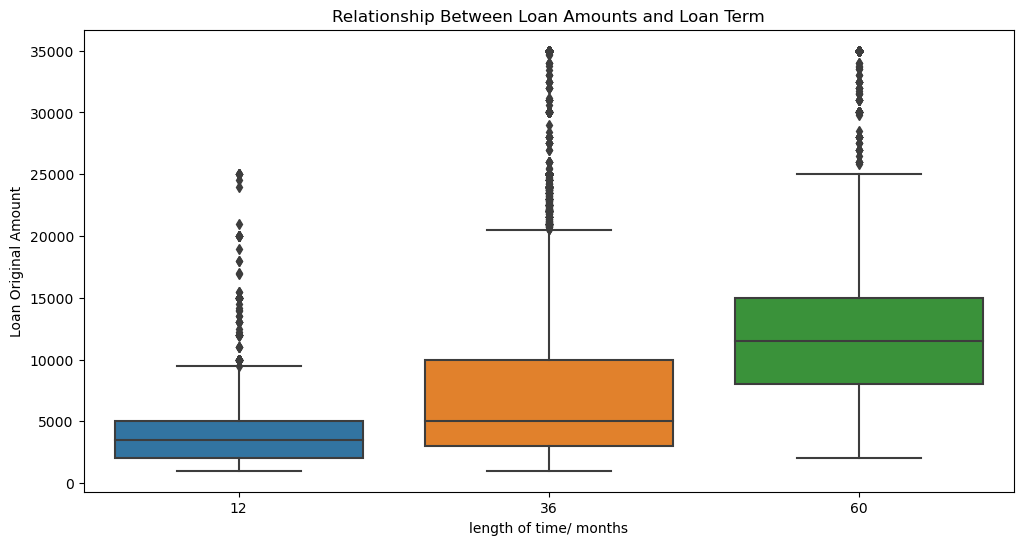

In [65]:
fig = plt.figure(figsize=(12,6))
sb.boxplot(y='LoanOriginalAmount', x='Term',
            data=df)
plt.title('Relationship Between Loan Amounts and Loan Term')
plt.ylabel('Loan Original Amount')
plt.xlabel('length of time/ months')
plt.show()

This reveals that loans with higher durations turn to get more amount of money as a compared to short term loans

#### Are Borrowers with Higher Prosper Score more likely to pay on time ?

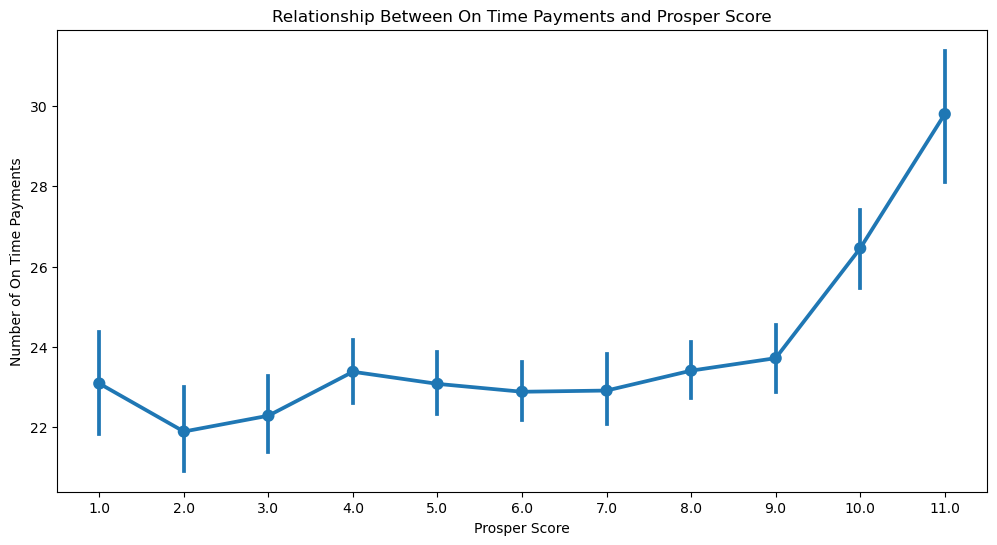

In [66]:
fig = plt.figure(figsize=(12,6))
sb.pointplot(y='OnTimeProsperPayments', x='ProsperScore',
            data=df)
plt.title('Relationship Between On Time Payments and Prosper Score')
plt.ylabel('Number of On Time Payments')
plt.xlabel('Prosper Score')
plt.show()

One very interesting thing is that as from 9 to 11 there's a very clear relation that indicate that people with high prosper score actually are trustworthy.

#### Does credit score affect a borrower's interest rate

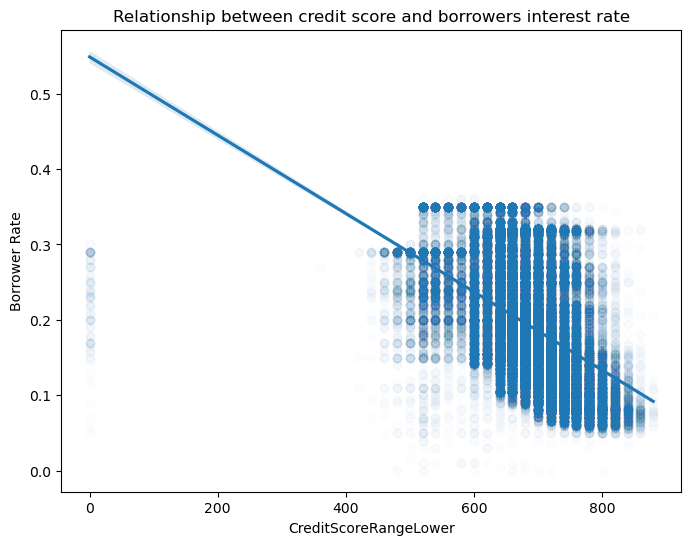

In [72]:
plt.figure(figsize = [8, 6])
sb.regplot(y='BorrowerRate', x='CreditScoreRangeLower',
            data=df, scatter_kws={'alpha':0.01})
plt.title('Relationship between credit score and borrowers interest rate')
plt.ylabel('Borrower Rate')
plt.xlabel('CreditScoreRangeLower')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. The higher your income the better your prosper score. 
2.One very interesting thing is that as from 9 to 11 there's a very clear relation that indicate that people with high prosper score actually are trustworthy
3. No Significant Difference can be observed in the distribution of the Prosper Score, for the borrowers who Own or Not Own a Home. However, an interesting pattern can be noticed, that the borrowers who have a Lower Prosper Score, the number of borrowers who Dont Own a Home > Who Own a Home. Whereas, for a Higher Prosper Score, the number of borrowers who Own a Home > Dont Own a Home.
 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1. One very interesting thing is that as from 9 to 11 there's a very clear relation that indicate that people with high prosper score actually are trustworthy

<a id='mul'></a>
## Multivariate Exploration


#### how has BorrowerRate changed over years for Homeowners vs Non-Homeowners

In [67]:
# Get the year from the creation date and create a column for it

df['year'] = df.ListingCreationDate.str.split('-').str[0]

In [68]:
year_data = df.year.value_counts()

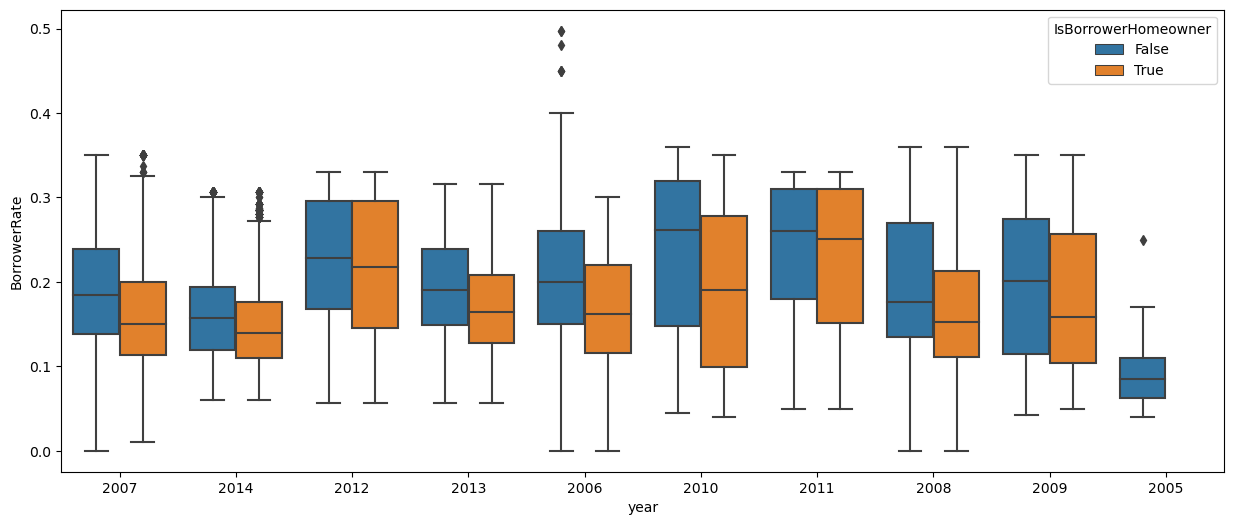

In [69]:
# plots the boxplot to analyze homeowner's and non-homeowner's rate over years

g = sb.boxplot(data=df, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)

over the years, the amount of people having houses and seeking for loans have been fluctuating.

### Prosper rating effect on relationship of APR and loan amount

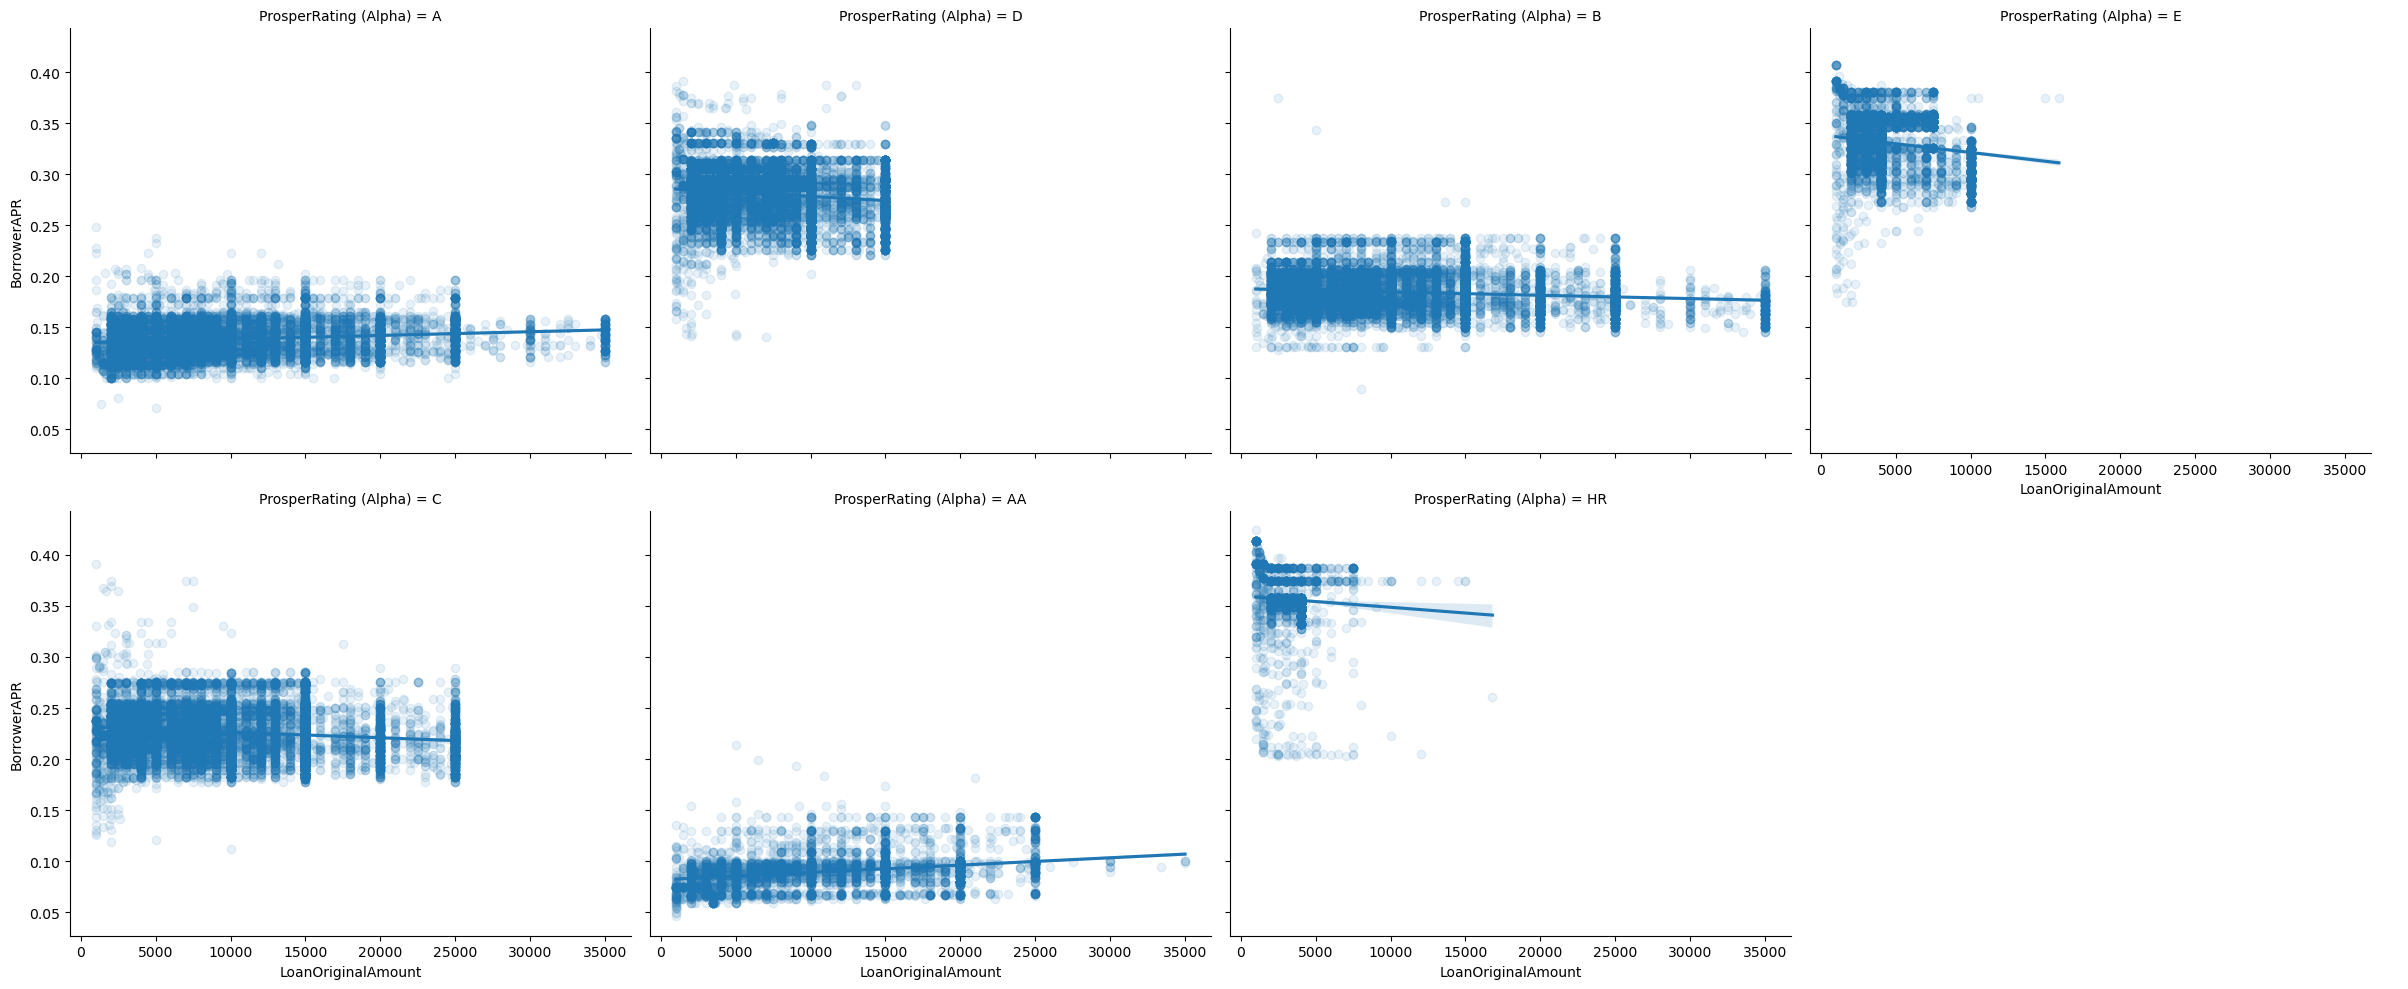

In [71]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I noticed that over the years those having a house and seeking for loans have reduced meaning someone might not have a house and still get the loan they want.

### Were there any interesting or surprising interactions between features?

> The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better.

<a id='conclude'></a>
## Conclusions

1. I can conclude that having a high prosper score guarantees you will get a higher loan/ increases your chances of getting a loan and a higher prosper score implies a borrower  pays less interest.
2. To have a high prosper score you need to have high income, be employed and even have a house. 
3. People who take loan for long time turn to receive higher amounts of loans.
4. surprisingly they were unemployed peopel earning 0 dollar a month and still got loans, this might be a point to research more about. 
5. The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

## Key Insights for Presentation

The exploration of the dataset led to the discovery of the various attributes about the Borrower's in the Prosper Loan dataset:

- Califoria is the state with the Highest Number of Borrowers.
- Highest number of the loans taken by the Borrowers have been categorised as Debt Consolidation.
- The number of Borrowers who Own & Dont Own a Home are almost evenly distributed in the dataset.
- Majority of the portion of Borrowers are Employed.
- Majority of the Borrowers have an income between 3000 - 6000.
- Most of the Borrowers have Prosper Scores between 4 - 8, with the Most Commonly occurring Prosper Score being 4.
- The exploration also enabled in the discovery of many correlations between the attributes of Loans, 
such as the Interest Rate, Monthly Payments and the Borrower's attributes such as Employment Status. 

## Reflection
I chose a prosper loan dataset for my project that has 113,937 observations and 81 variables. Without any prior financial expertise, it was challenging to get started with so many variables.  Understanding the meaning of each variable is thus necessary before beginning any data analysis. I selected "BorrowerRate" as my target variable after reading the descriptions and definitions because a potential borrower would be very interested in knowing this value.

The next step is to get to know the variables.  We can utilize various summary functions in python(pandas) to acquire a broad understanding of the dataset. For instance, describe(data) provides the summary statistics of variables. Utilizing data visualizations is a different strategy. Histograms and boxplots are effective ways to display the distributions of individual variables and spot outliers.

After gaining some insight into each individual variable, we can proceed to the next stage and begin to investigate the relationships between variables, particularly those connected to our target variable. The most popular type of plot to display relationships between two variables is a scatter plot. In this project, I started by creating a scatter matrix that displayed several comparisons at once. We can exclude some factors with low correlations to the target variable from the scatter matrix. We can investigate these linkages further for those with stronger correlations.

Adding color to the plot is a quick and easy technique to demonstrate correlations between multiple variables. factorial variables are represented by various colors. The scatter plot's point size can also be used to represent numerical variables, with bigger points denoting bigger numbers.

### Limitations
Exploratory data analysis is a useful tool for getting to know the data through engaging representations. However, statistical analysis and the creation of prediction models are required before we can make a definitive claim regarding the correlations between variables.